In [1]:
from plot import plot_rewards_sum, plot_eval_sum, plot_eval_safety, load_data
import matplotlib.pyplot as plt

['IPPO/2024-06-18_162342', 'SIPPO/2024-06-18_163810', 'SIPPO/2024-06-18_154455', 'SIPPO/2024-06-18_160841']


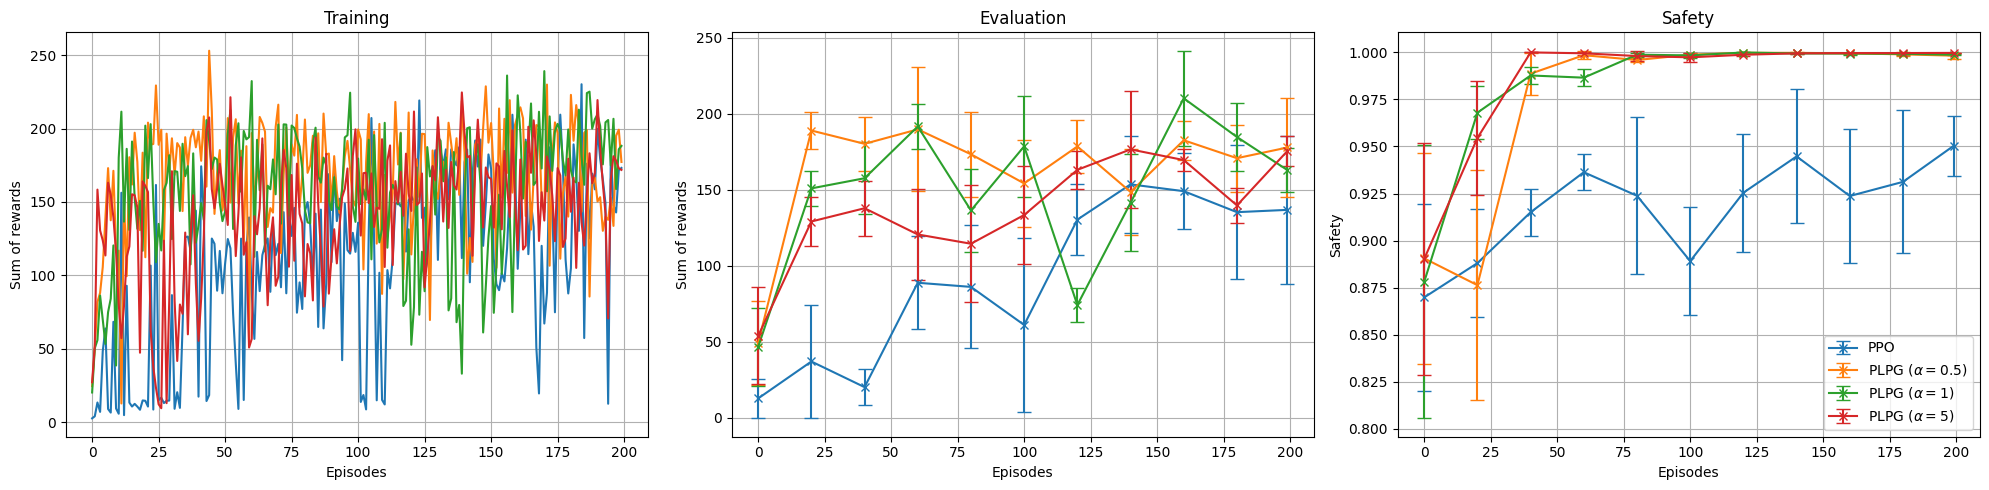

In [3]:
base = "../histories/CartSafe-v0"
# files = {"IPPO": ["2024-06-18_162342"], "SIPPO": ["2024-06-18_163810", "2024-06-18_154455", "2024-06-18_160841"]}
files = {"IQL": ["2024-06-18_190330"]}

algo_filenames = [k+"/"+v for k, vs in files.items() for v in vs]
print(algo_filenames)
labels = [r"PPO", r"PLPG ($\alpha=0.5$)", r"PLPG ($\alpha=1$)", r"PLPG ($\alpha=5$)"]

train_ax = plt.subplot(1, 3, 1)
eval_ax = plt.subplot(1, 3, 2)
safety_ax = plt.subplot(1, 3, 3)

# resize
plt.gcf().set_size_inches(20, 5)

for f,file in enumerate(algo_filenames):
    train, eval, safety, eval_eps = load_data(base, file, "all")
    plot_rewards_sum(train, train_ax)
    plot_eval_sum(eval, eval_eps, eval_ax)
    plot_eval_safety(safety, eval_eps, safety_ax, label=labels[f])    


train_ax.set_title("Training")
train_ax.set_xlabel("Episodes")
train_ax.set_ylabel("Sum of rewards")
train_ax.grid(True)

eval_ax.set_title("Evaluation")
eval_ax.set_xlabel("Episodes")
eval_ax.set_ylabel("Sum of rewards")
eval_ax.grid(True)

safety_ax.set_title("Safety")
safety_ax.set_xlabel("Episodes")
safety_ax.set_ylabel("Safety")
safety_ax.grid(True)
safety_ax.legend()

plt.tight_layout()
plt.show()